CNN

#DATASET

##Using CIFAR-10

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
from keras.utils import to_categorical

##Prepare training and testing dataset

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test.astype('float32')
x_test = x_test / 255.0

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Network Architecture

## Why use LeNet-5

* Simplicity: LeNet-5 has only five layers, making it simple to implement.
* Efficiency: LeNet-5 has relatively few parameters so it can be trained quickly.
* Robustness to overfitting: LeNet-5 has a relatively small number of parameters and uses simple regularization techniques such as dropout.

## Key Components of LeNet-5

* Convolutional layers: LeNet-5's key building block is its use of convolutional layers. In order for convolutional layers to function, the input image must be filtered. A small matrix of weights serves as the filter. The input image is subjected to the weights element by element, and the outcomes are summed to give a single output value. Every component of the input image is subjected to this process again.
* Pooling layers: By combining the values of nearby pixels, pooling layers seek to compress the size of the feature maps. They also assist in strengthening the network's resistance to noise and overfitting.
* Fully connected layers: The features extracted from the convolutional layers are combined and predictions are made using fully connected layers. It performs its function by producing a single output vector using the convolutional layer output as its input. The projected probability for every class are contained in the output vector.


##LeNet-5 Architecture

LeNet-5 has five layers:
* Two convolutional layers
* Two pooling layers
* One fully connected layer

The first convolutional layer extracts simple features such as edges and corners. The second convolutional layer extracts more complex features such as shapes and objects. The pooling layers reduce the size of the feature maps and make the network more efficient. The fully connected layer combines the features extracted from the convolutional layers and makes predictions.

#Model Implementation

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [8]:
model = Sequential()

In [9]:
#First convolutional layers
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
#First Pooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#Second convolutional layers
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
#Second pooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#Fully connected layers
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
782/782 [==============================] - 14s 5ms/step - loss: 2.2905 - accuracy: 0.2223
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 1.7692 - accuracy: 0.3561
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 1.6159 - accuracy: 0.4167
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 1.5064 - accuracy: 0.4562
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 1.4285 - accuracy: 0.4887


#Model Evaluation

In [23]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.4563 - accuracy: 0.4828


In [24]:
print("Accuracy: ", acc)
print("Loss: ", loss)

Accuracy:  0.4828000068664551
Loss:  1.4562979936599731


In [20]:
accuracy = [acc]

In [15]:
import matplotlib.pyplot as plt

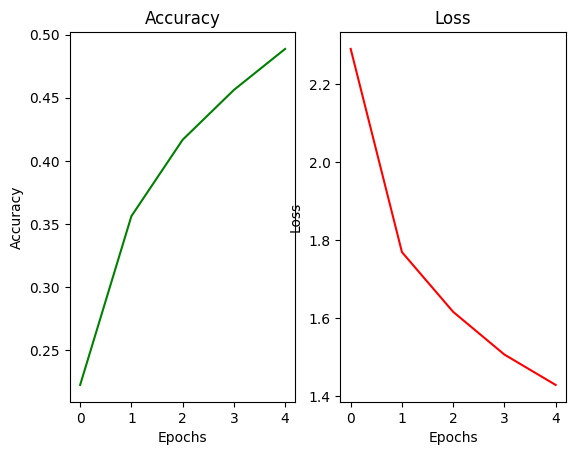

In [22]:
plt.subplot(121)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color='green')
plt.plot(accuracy)
plt.subplot(122)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='red')
plt.show()

#Model Improvement
Using hyperparameters, regularization techniques, and data augmentation

In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test.astype('float32')
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [48]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 6)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 5, 5, 16)         

In [49]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
782/782 [==============================] - 6s 6ms/step - loss: 1.9998 - accuracy: 0.2435
Epoch 2/5
782/782 [==============================] - 4s 5ms/step - loss: 1.7388 - accuracy: 0.3607
Epoch 3/5
782/782 [==============================] - 4s 5ms/step - loss: 1.6516 - accuracy: 0.3974
Epoch 4/5
782/782 [==============================] - 4s 6ms/step - loss: 1.6095 - accuracy: 0.4185
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 1.5696 - accuracy: 0.4331


In [50]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.4746 - accuracy: 0.4906


In [51]:
print("Accuracy: ", acc)
print("Loss: ", loss)

Accuracy:  0.49059998989105225
Loss:  1.4746074676513672


Model 2's increased complexity over Model 1 could be one cause for this. Higher accuracy may result from the ability of more complicated models to learn more intricate patterns in the data. But more intricate models also have a higher chance of overfitting the training set. When a model learns the training data too well and is unable to generalise to new data, this is known as overfitting.

Model 2 being trained on a lesser dataset than Model 1 is another rationale that might apply. Greater loss and greater volatility in the model's performance can result from smaller datasets.

However, Model 2 is likely to be the better model, even though it has a higher loss.

##If we increase the epochs = 50 in model 2

In [59]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test.astype('float32')
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 6)         0         
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 5, 5, 16)         

In [63]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
782/782 [==============================] - 6s 6ms/step - loss: 1.9679 - accuracy: 0.2561
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7019 - accuracy: 0.3738
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.6335 - accuracy: 0.4047
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5936 - accuracy: 0.4203
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5703 - accuracy: 0.4302
Epoch 6/50
782/782 [==============================] - 4s 6ms/step - loss: 1.5524 - accuracy: 0.4365
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5327 - accuracy: 0.4488
Epoch 8/50
782/782 [==============================] - 4s 5ms/step - loss: 1.5141 - accuracy: 0.4534
Epoch 9/50
782/782 [==============================] - 4s 6ms/step - loss: 1.5082 - accuracy: 0.4549
Epoch 10/50
782/782 [==============================] - 4s 5ms/step - loss: 1.4958 - accuracy: 0.4583

In [64]:
loss, acc = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.1754 - accuracy: 0.5857


In [65]:
print("Accuracy: ", acc)
print("Loss: ", loss)

Accuracy:  0.5856999754905701
Loss:  1.1753597259521484


##If using data augmentation

In [66]:
from keras.preprocessing.image import ImageDataGenerator

In [67]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test.astype('float32')
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()
model.add(Conv2D(6, kernel_size=(5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [69]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 14, 14, 6)         0         
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 5, 5, 16)         

In [70]:
from tensorflow.python.ops.gen_batch_ops import batch
#Create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(x_train, y_train, batch_size=64)

In [71]:
#Fit model
steps = int(x_train.shape[0]/64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=50, verbose=1)

Epoch 1/50


<ipython-input-71-610c631f27d3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=50, verbose=1)


781/781 [==============================] - 43s 52ms/step - loss: 2.0988 - accuracy: 0.2077
Epoch 2/50
781/781 [==============================] - 33s 42ms/step - loss: 1.7904 - accuracy: 0.3291
Epoch 3/50
781/781 [==============================] - 32s 40ms/step - loss: 1.7247 - accuracy: 0.3576
Epoch 4/50
781/781 [==============================] - 33s 42ms/step - loss: 1.6934 - accuracy: 0.3735
Epoch 5/50
781/781 [==============================] - 31s 40ms/step - loss: 1.6688 - accuracy: 0.3818
Epoch 6/50
781/781 [==============================] - 30s 39ms/step - loss: 1.6541 - accuracy: 0.3898
Epoch 7/50
781/781 [==============================] - 30s 38ms/step - loss: 1.6396 - accuracy: 0.3983
Epoch 8/50
781/781 [==============================] - 30s 39ms/step - loss: 1.6296 - accuracy: 0.3997
Epoch 9/50
781/781 [==============================] - 29s 37ms/step - loss: 1.6133 - accuracy: 0.4087
Epoch 10/50
781/781 [==============================] - 30s 38ms/step - loss: 1.6069 - accurac

In [72]:
loss, acc = model.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 1.3714 - accuracy: 0.5018


In [73]:
print("Accuracy : ", acc)
print("Loss : ", loss)

Accuracy :  0.5856999754905701
Loss :  1.1753597259521484


Based on the results of accuracy and loss evaluation, it is concluded that the best model is a model with dropout regularization, hypermarameter optimizer adam with a learning rate of 0.001 and epoch 50. The use of augmented data does not affect the accuracy and loss values significantly.